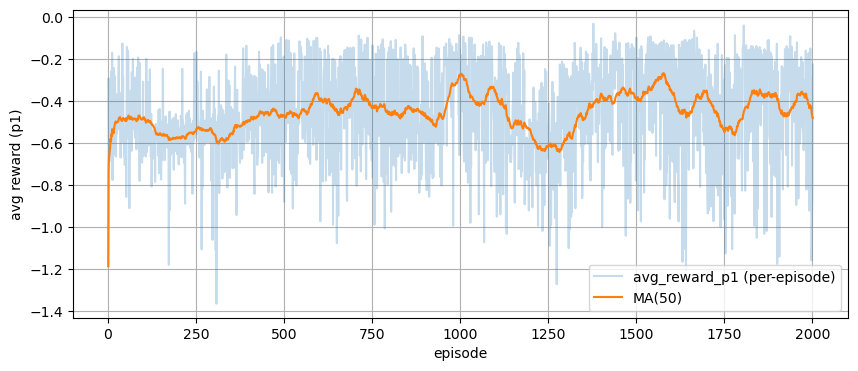

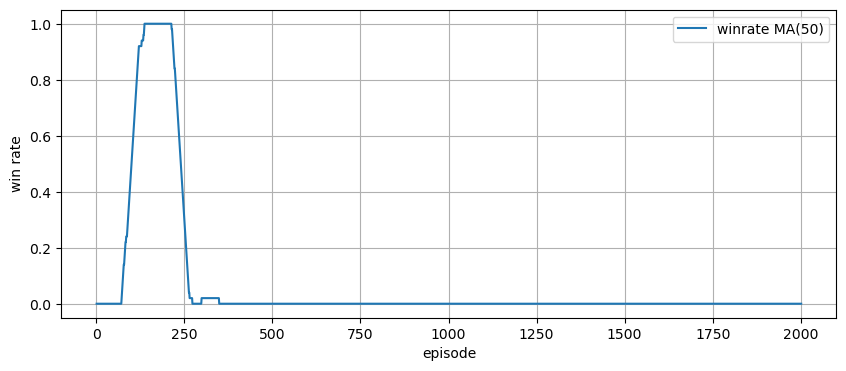

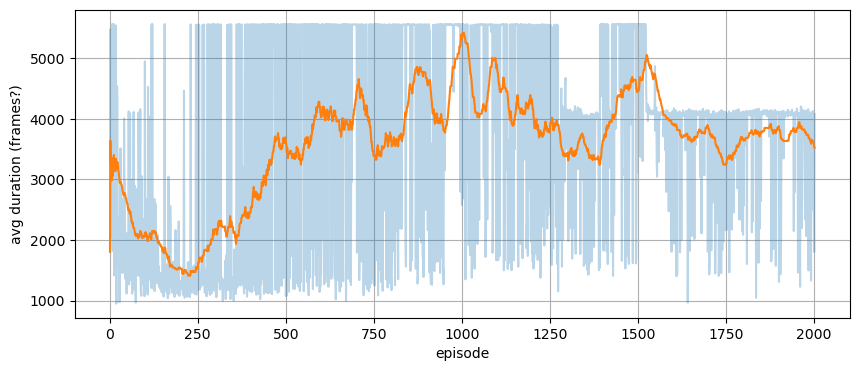

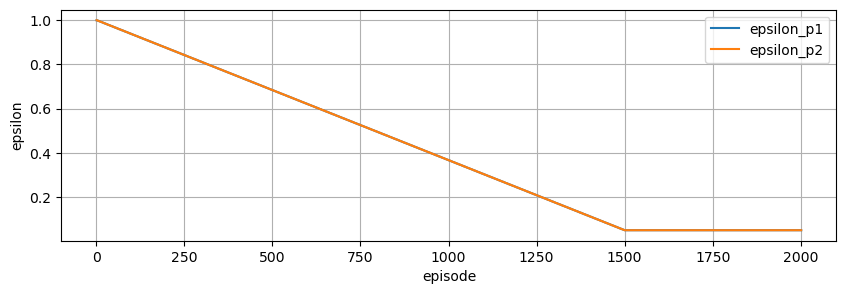

done. run the cells and inspect the plots. For more, feed me one CSV (episode-level) and I'll make a dashboard image for you.


In [3]:
# paste into a notebook (requires pandas, matplotlib)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- config: filepaths (edit) ---
episodes_csv = "logs/phase_2_episodes_20251107_204148.csv"   # or phase_2 file
rewards_csv  = "phase_1_rewards_20251107_125500.csv"
steps_csv    = "phase_1_steps_20251107_125500.csv"

# --- read data ---
ep = pd.read_csv(episodes_csv)
# optional: rewards, steps if you log finer stats
# rw = pd.read_csv(rewards_csv)
# st = pd.read_csv(steps_csv)

plt.style.use('default')

# helper
def ma(x, w=50):
    return x.rolling(w, min_periods=1).mean()

# 1) Episode reward + moving average
if 'avg_reward_p1' in ep.columns:
    fig, ax = plt.subplots(1,1, figsize=(10,4))
    ax.plot(ep['episode'], ep['avg_reward_p1'], alpha=0.25, label='avg_reward_p1 (per-episode)')
    ax.plot(ep['episode'], ma(ep['avg_reward_p1'], 50), label='MA(50)')
    ax.set_xlabel('episode'); ax.set_ylabel('avg reward (p1)')
    ax.legend(); ax.grid(True)
    plt.show()

# 2) Win rate (rolling window)
# if score_p1 and score_p2 are cumulative per-episode, compute who won that episode
if {'score_p1','score_p2'}.issubset(ep.columns):
    # assuming each row contains scoreboard for that episode
    # define boolean: did p1 win this episode?
    ep['p1_win'] = ep['score_p1'] > ep['score_p2']
    ep['winrate_50'] = ep['p1_win'].rolling(50, min_periods=1).mean()
    fig, ax = plt.subplots(1,1, figsize=(10,4))
    ax.plot(ep['episode'], ep['winrate_50'], label='winrate MA(50)')
    ax.set_ylim(-0.05,1.05); ax.set_xlabel('episode'); ax.set_ylabel('win rate')
    ax.grid(True); ax.legend(); plt.show()

# 3) avg duration
if 'avg_duration' in ep.columns:
    fig, ax = plt.subplots(1,1, figsize=(10,4))
    ax.plot(ep['episode'], ep['avg_duration'], alpha=0.3)
    ax.plot(ep['episode'], ma(ep['avg_duration'],50), label='MA(50)')
    ax.set_xlabel('episode'); ax.set_ylabel('avg duration (frames?)'); ax.grid(True); plt.show()

# 4) epsilon
if 'epsilon_p1' in ep.columns:
    fig, ax = plt.subplots(1,1, figsize=(10,3))
    ax.plot(ep['episode'], ep['epsilon_p1'], label='epsilon_p1')
    ax.plot(ep['episode'], ep['epsilon_p2'], label='epsilon_p2' if 'epsilon_p2' in ep.columns else '')
    ax.set_xlabel('episode'); ax.set_ylabel('epsilon'); ax.legend(); ax.grid(True); plt.show()

# 5) loss and Q stats (if logged per-step)
if 'loss_p1' in ep.columns:
    fig, ax = plt.subplots(1,1, figsize=(10,4))
    ax.plot(ep['episode'], ep['loss_p1'], alpha=0.3, label='loss_p1')
    ax.plot(ep['episode'], ma(ep['loss_p1'],50), label='loss MA(50)')
    ax.set_xlabel('episode'); ax.set_ylabel('loss'); ax.legend(); ax.grid(True); plt.show()

if 'q_p1' in ep.columns:
    fig, ax = plt.subplots(1,1, figsize=(10,4))
    ax.plot(ep['episode'], ep['q_p1'], alpha=0.3)
    ax.plot(ep['episode'], ma(ep['q_p1'],50), label='q mean MA(50)')
    ax.set_xlabel('episode'); ax.set_ylabel('Q value'); ax.legend(); ax.grid(True); plt.show()

# 6) action distribution (if you have action logs)
# if you have a per-step actions CSV with columns 'episode','action'
# actions = pd.read_csv('actions.csv')
# freq = actions.groupby('action').size().sort_index()
# freq.plot(kind='bar')

print("done. run the cells and inspect the plots. For more, feed me one CSV (episode-level) and I'll make a dashboard image for you.")
